# Statistics: Inference

WIP:

In this notebook we are going to introduct the main concepts and caveats about statistics inference and hypothesis test. Different alternatives to perform hypothesis test and thei Pros and Crons. The goal is to make easy to rememeber the important pices in ordr to be able to apply on your day-to-day work as Data Scinetists/Business analaysts or Machine learning engineer. 

Some of this concepts wont be proved but verified with simulated data and experiments. 

* TODO: add references
* 

## Central Limit Theorem (CLT)

The central Limit Theorem is the base of all hypothesis test. It is what make the test work. The theorem is stated bellow:

Let $X_1, X_2, \dots, X_n$ be a sequence of independent and identically distributed (i.i.d.) random variables with finite mean $\mu = \mathbb{E}[X_i]$ and finite variance $\sigma^2 = \mathrm{Var}(X_i) < \infty$. Let $\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i$ denote the sample mean.

Then, as the sample size $n \to \infty$, the distribution of the standardized sample mean  
$$
Z_n = \frac{\bar{X}_n - \mu}{\sigma / \sqrt{n}}
$$  
converges in distribution to the standard normal distribution:
$$
Z_n \xrightarrow{d} \mathcal{N}(0,1)
$$

In other words, the distribution of the sample mean of i.i.d. variables approaches a normal distribution as the sample size increases, regardless of the original distribution of the variables, as long as the variance is finite.

In simple words:

"The sampling mean distribtuion is normal regardless the unknown Population distribution (shape)"
 
 ![Central Limit Theorem](images/IllustrationCentralTheorem_1.png)

The speed at which the sampling distribution of the sample mean converges to $N(\mu,\frac{\sigma^2}{n})$
depends on the shape of the population distribution and the sample size $n$. If the population distribution is approximately normal, the convergence is rapid, and even small sample sizes may suffice. However, if the population distribution is highly skewed or heavy-tailed, a much larger sample size is required for the sampling distribution to converge to normality.

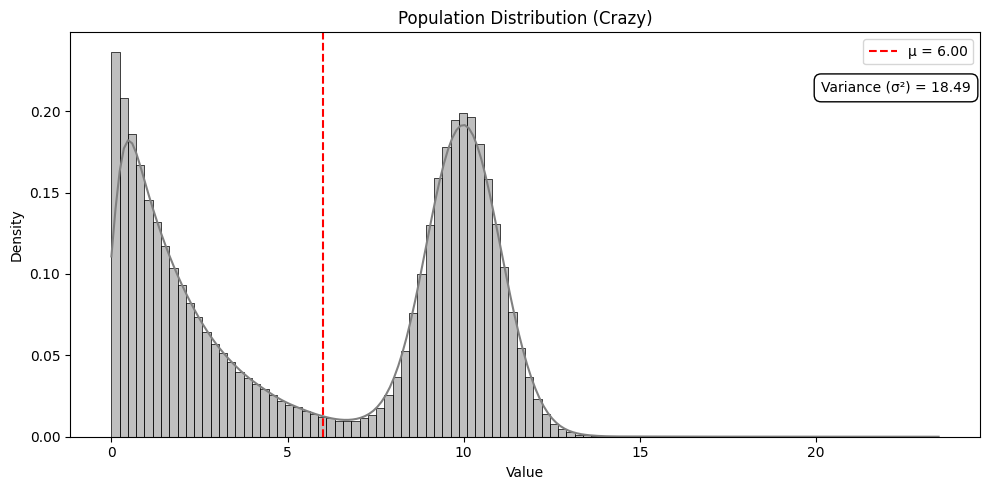

In [1]:
import numpy as np
from utils import gen_and_plot_population_distribution

population = gen_and_plot_population_distribution(size=500_000, scale1=2, scale2=1)

population_mean = np.mean(population)
population_var = np.var(population)

Taking one sample of size $n$

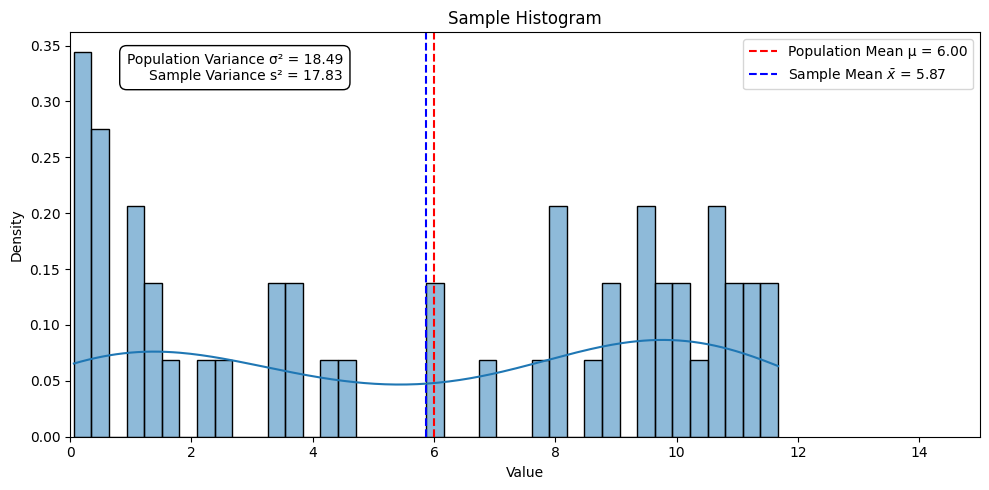

In [2]:
from utils import plot_one_sample

plot_one_sample(population, size=50)

Because the population distribution does not have many values around the mean (it is a bimodal distribution), this is reflected in the sample distribution, where most values lie at the edges of the graph. However, the sample mean $\bar{x}$ still tends to lie near the population mean at the center of the graph.

Now, let's take 1,000 samples from the population and compute the sample mean for each sample to build the distribution of sample means:

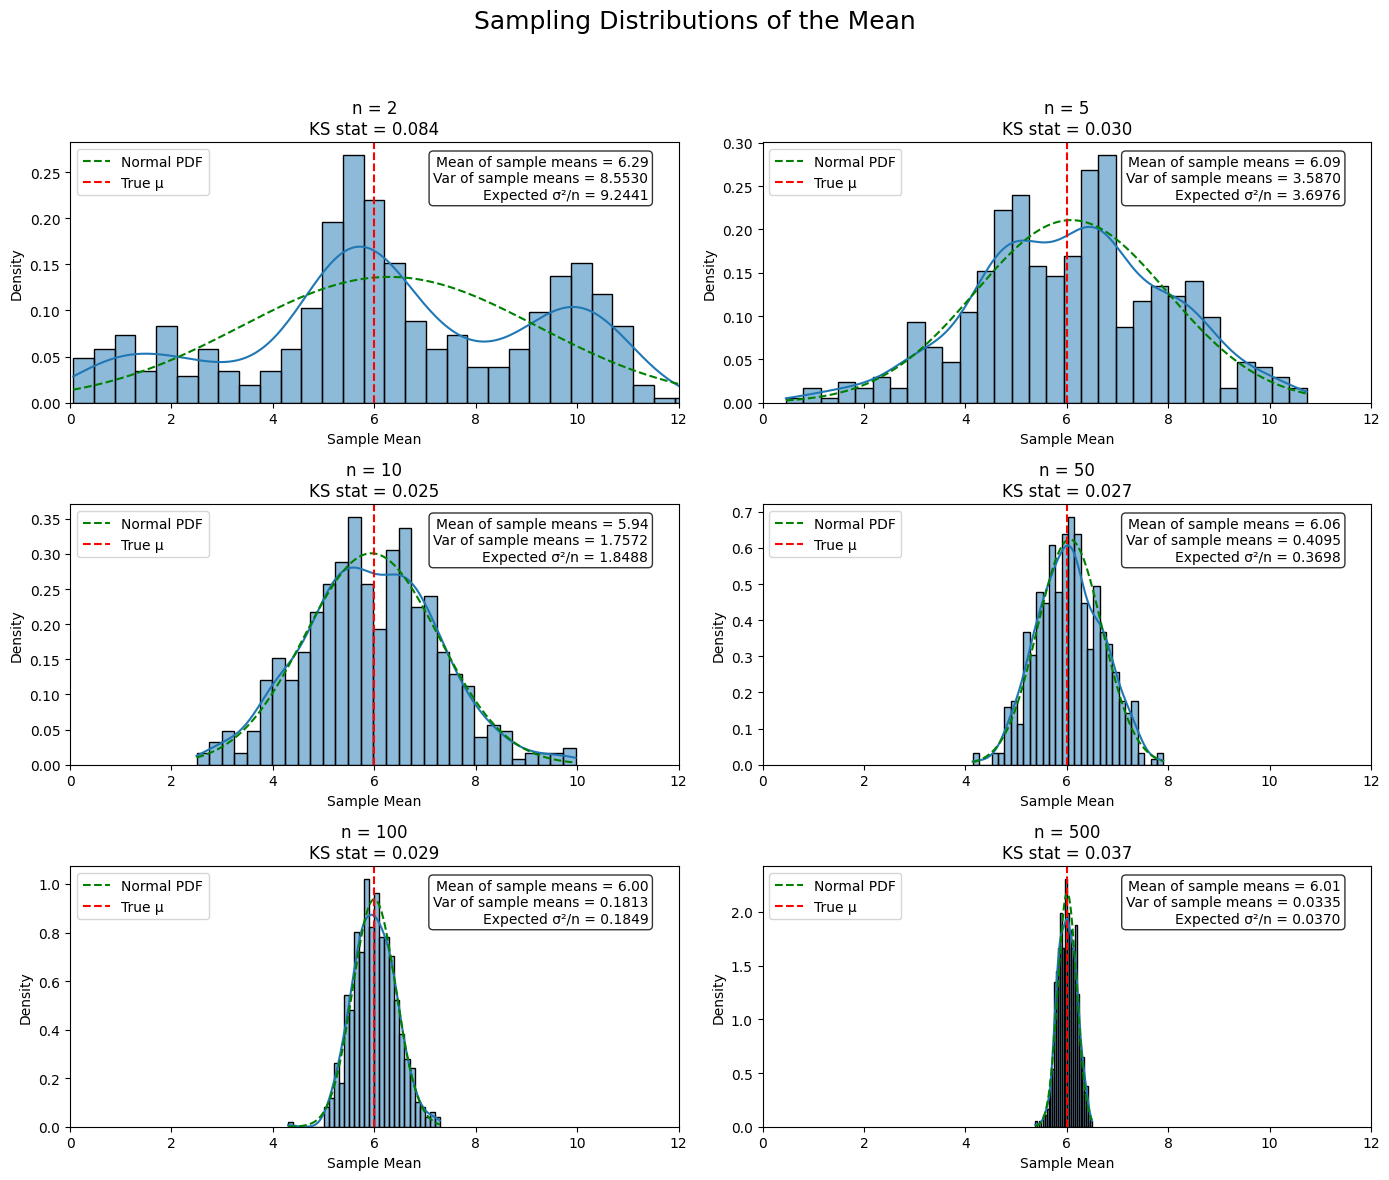

In [3]:
from utils import plot_sampling_distributions

plot_sampling_distributions(population,sample_sizes=[2, 5, 10, 50, 100, 500], num_samples=500)

In the graph above, we can noticed for sample sizes $n < 10$, some of the samples has means as lower as 3.00 and higher as 9.00. These values are far from the population mean $\mu = 6.00$. Hoewever, as the sample size increases, the **variance of the sample means** converges to the expected $\frac{\sigma^2}{n}$. **This is a powerful result**. To better estimate the population mean and reduce the uncertainty of the measurement, we can increase the sample size. Of course, this does not account for the cost of increasing the sample size, which is often expensive or not feasible.

Additionally, the distribution of sample means allows us to understand the expected variation without needing to repeatedly sample from the population, saving time and money. It also enables us to make probabilistic inferences, such as calculating $p-values$ and constructing confidence intervals.

**Common Mistake**
  
* Sample variance (used inside a sample): this estimates population variance from a sample.
* Sampling variance of the mean: variance across many sample means. That’s what we’re measuring here, and that should converge to $\frac{\sigma^2}{n}$ where $n$ is the sample size of each sample.

**Key takeaways**

*  In real-world hypothesis testing, you usually have just one sample, not thousands of them.
*  We use the mean of one sample as estimation of the population mean $\mu$
*  The sampling distribution of the mean tells you what kind of variation to expect if we repeat the sampling many times
    * Because of **CLT**, we can make probabilistic inferences (like computing p-values or confidence intervals). The sample mean distribution converges to $\bar{x} \sim N(\mu, \frac{\sigma^2}{n})$ as $n \to^{d} \infty$ withouting taking too many samples of the population that is often expensive.  

## Hypothesis test

Hypothesis testing is widely used across various fields, including industry, research, marketing, finance, and medicine

In medical research, the strongest evidence often comes from randomized, double-blind controlled trials (**double-blind RCT**). These studies are built around a well-defined hypothesis and are designed so that neither the patients nor the doctors know who received the placebo or the drug being tested. This setup minimizes bias and helps ensure the validity of the results



### hypothesis test: based on p-values and power

In a hypothesis test, we usually compare two groups to determine whether there is a significant difference between their means. For example, one group might consist of users who receive a new variation of a website, while the control group consists of users who see the original version. The goal is to determine whether the new variation increases the average number of active users.

Another example involves a clinical trial: one group receives a placebo (the control group), while the other receives a new drug. We want to know whether the new drug improves heart health.

The big picture is that we have two groups, and we want to determine whether there is a statistically significant difference between their means.

To do this, we calculate the p-value and statistical power. If the p-value is very small, it suggests that the null hypothesis ($H0$) is unlikely to be true, and we reject $H0$. If the p-value is not small enough, the results are considered inconclusive, and we fail to reject $H0$.

Given the same experimental context, tests with smaller $p-value$ are considered to have stronger evidence that there is significant statistics difference than tests with higher $p-values$. 

The table bellow is all possible outcome. 

```
| decision (prediction)/actual | **Reality: H₀ True**                    | **Reality: H₀ False (i.e., Hₐ True)**             |
|------------------------------+-----------------------------------------+---------------------------------------------------|
| **Reject H₀**                | Type I Error (α) = False Positive/Alarm | Correct Decision (True Positive)                  |
| **Fail to Reject H₀**        | Correct Decision (True Negative)        | Type II Error (β) = False Negative/Fail to detect |
|------------------------------+-----------------------------------------+---------------------------------------------------|
```

$
\alpha = P(\text{Reject } H_0 \mid H_0 \text{ is true}) = P\left( \bar{x} \notin \left[ \mu_0 \pm X_{\text{crit}} \right] \,\middle|\, \mu = \mu_0 \right)
$

$
\beta = P(\text{Fail to reject } H_0 \mid H_a \text{ is true}) = P\left( \bar{x} \in \left[ \mu_0 \pm X_{\text{crit}} \right] \,\middle|\, \mu = \mu_a \right)
$

where $X_{\text{crit}}$ is critical values.


The next figures also explain all possibles outcomes and all main values and errors. It shows the **one-side** hypothesis test where we consider only on side of the curve to compute the $p-values$. There are 2 sampling distribution: $H0: N(\mu_0, \frac{\sigma^2}{n})$ and $Ha: N(\mu_a, \frac{\sigma^2}{n}) $.

The $Ha$ mean $\mu_a$ and variance $\frac{\sigma}{\sqrt{n}}$ can be determined based on prior knowledge, previous experiments or estimated by using the variance of the sample.

The $p-value$ is the area under the curve defined by the observed value (measured by the research) and the infinity. Usually you set a threshold to compare with the observed $p-value$ to reject or fail to reject $H0$. 0.05 is quite common, but other smalle values for big data is used as well (0.01 or 0.001). 

Whe we normalize the difference of the means between of the groups. We called this **effect size**

$
d =\frac{\mu_a - \mu_0}{\sigma}
$


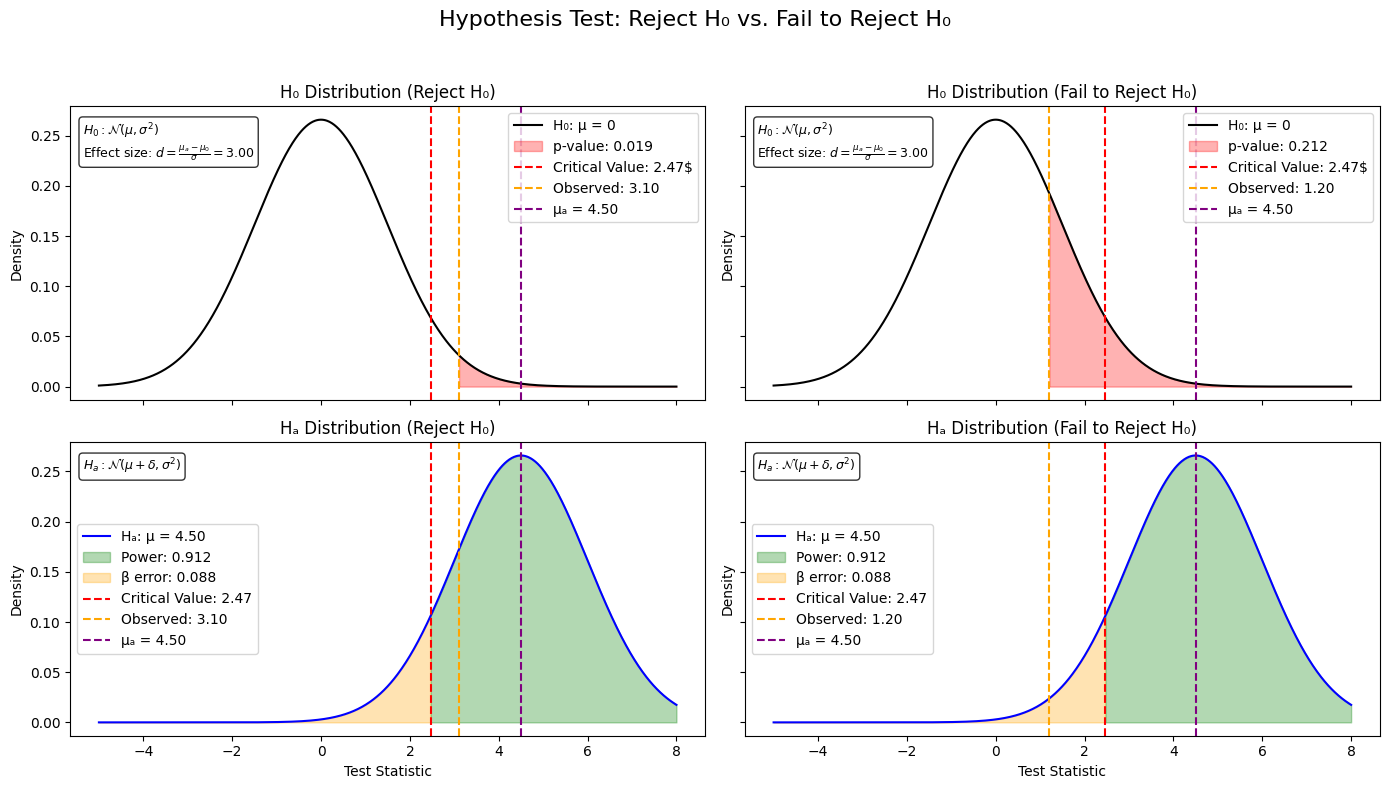

In [4]:
from utils import plot_4_panel_test

plot_4_panel_test(obs_val_pass=3.1, obs_val_fail=1.2, pop_std=1.5, mean_diff=4.5)

Another important concept in hypothesis testing is statistical Power. Power is related to false negatives (FN = Type II error), which occur when **there is a real effect or difference, but we fail to detect it**. In other words, Power is the probability of correctly rejecting the null hypothesis when the alternative hypothesis is true.

We design experiments to ensure they have enough power to detect the minimal meaningful difference we care about. That is, we want our test to be sensitive enough to pick up an effect of a certain size, if it truly exists.

Usually, we don’t know the true mean under the alternative hypothesis ($\mu_a$), which is required to compute power. However, **we can often estimate it based on previous studies, meta-analyses, or an educated guess**. In A/B testing, we typically don’t know $\mu_a$ in advance, so we assume a plausible value based on what difference would be meaningful or cost-effective to detect. So 

> **Power is not an absolute truth — it’s a function of a "what-if" assumption**. 

For example, when we say the test has 80% Power, we actually mean: “This test has an 80% chance of detecting an effect of size X, if that effect really exists.”

Power depends on:
* the effect size ($\delta = \mu_a - \mu_0$), and
* the sampling variance ($\sigma^2 / n$), which reflects how much data we collect

The factors we can actively control are:
* the assumed effect size ($\mu_a$), for planning purposes
* the sample size ($n$), which directly reduces the sampling variance

To illustrate how power changes, the simulation below shows two scenarios:

1. Keeping the mean difference constant ($\delta = \mu_a - \mu_0$), we vary the population variance ($\sigma^2$)
1. Keeping the variance constant ($\sigma = \text{constant}$), we vary the mean difference ($\delta$)

In both cases, the population parameters ($\mu_a$, $\sigma^2$) **are out of our control — they're determined by nature**. What we can control is the sample size, which affects the variability of the sampling distribution under the alternative $Ha: Var(X) = \frac{\sigma^2}{n}$ as mentioned before.


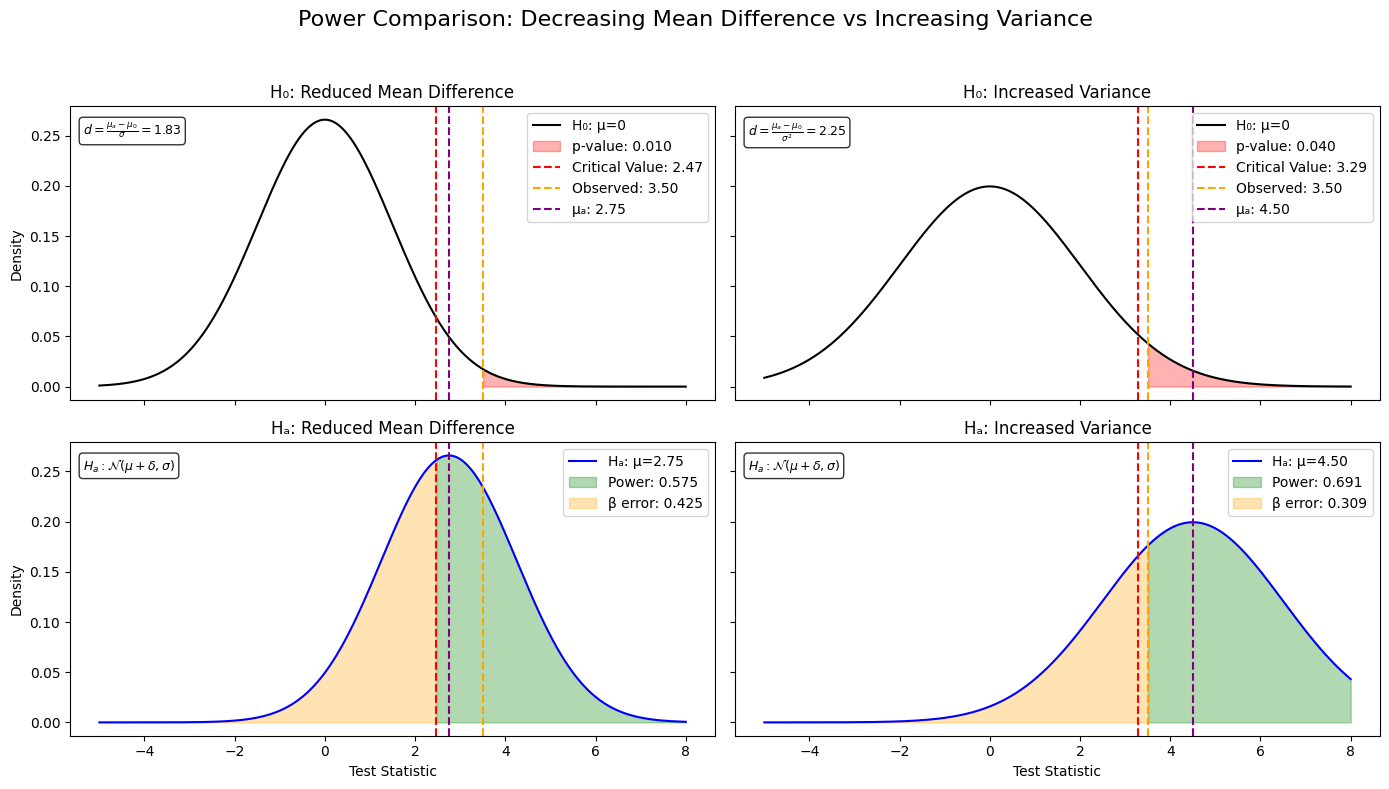

In [5]:
from utils import plot_power_comparison

plot_power_comparison(obs_val=3.5, alpha=0.05)

This lead us to:

$$
Power \propto \frac{\delta}{\frac{\sigma}{\sqrt{n}}}
$$

From this formula, we can see that power does not increase linearly with sample size $n$. Instead, it increases with the square root of $n$. That means as you collect more data, each additional unit of sample size contributes less to improving power than the previous one.

> **Doubling the sample size does not double the power — the gains diminish as $n$ gets larger.**

So, increasing power by the same amount becomes increasingly costly, because it requires a disproportionately larger sample size.


### Power analyses

For design our experiment that means basically determine an minimum sample size. We draw a power analyses.

The parameter effect_size you're passing is a standardized effect size, specifically Cohen’s d, defined as:

$$
d = \frac{\mu_1 - \mu_0}{\sigma}
$$

So, once you specify an effect size like d = 0.05, you've already indirectly specified how large the mean difference is relative to the standard deviation. There's no need to pass absolute values of means or variances. So the next steps is just to vary the sample sizes.


In [176]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_ztest_power_curve(effect_sizes=[0.01, 0.02, 0.05, 0.1], 
                           sample_sizes=range(5, 50000, 25), 
                           alpha=0.05, 
                           one_sided=True,
                           title='Power Curve for Z-Test'):

    z_alpha = norm.ppf(1 - alpha) if one_sided else norm.ppf(1 - alpha / 2)
    sample_sizes = np.array(sample_sizes)

    plt.figure(figsize=(5, 3))

    for d in effect_sizes:
        powers = []
        for n in sample_sizes:
            z_beta = z_alpha - d * np.sqrt(n)
            power = 1 - norm.cdf(z_beta)
            powers.append(power)

        plt.plot(sample_sizes, powers, label=f'd = {d:.2f}')

    plt.axhline(0.8, color='gray', linestyle='--', linewidth=1, label='80% Power')
    plt.title(title + f"\n$\\alpha = {alpha}$, {'One-sided' if one_sided else 'Two-sided'}")
    plt.xlabel('Sample Size')
    plt.ylabel('Power')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


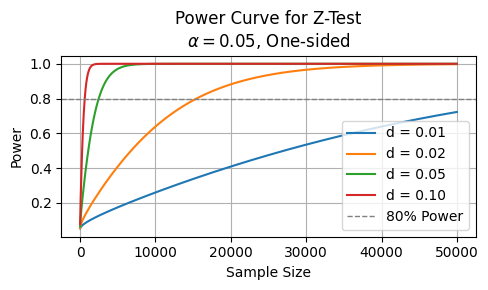

In [177]:
plot_ztest_power_curve()

### z-test

We use this test when we only conllect one sample and we know the population variance $\sigma^2$ or the sample size of the sample is large enough (usually $n \geq 30$).

The goal of the test whether the sample mean differs significantly from a known population mean $\mu$.

Test statistic:

$$
z = \frac{\bar{x}_n - \mu}{\sigma \sqrt{n}}
$$ 

where:
* $\bar{x}_n$ = sample mean
* $\mu$ = hypothesized population mean
* $\sigma$ = population standard deviation
* $n$ = sample size

Steps:

1. Set $H_0$: e.g., $\mu = \mu_0$
1. Choose $\alpha$ (e.g., 0.05)
1. Compute $z$
1. Find p-value from standard normal distribution $N(0,1)$
1. Decision: reject $H_0$ if p-value < $\alpha$ (usaully $\alpha = 0.05$).


Here is an example of application:

LEGO bricks connect through **circular connectors** (cylindrical studs) that must fit into corresponding holes on other bricks. LEGO claims that the outer diameter of each connector is exactly 4.8 mm.

A new molding machine is being tested. Based on historical data from other machines, the **standard deviation** of the outer diameter is known to be 0.1 mm. To verify whether the new machine meets expectations, engineers took a sample of 16 bricks and measured an average diameter of 4.78 mm.

<p align="center">
  <img src="images/lego.png" alt="LEGO Connector Fit Test" width="400"/>
</p>


Solution:

* We choose a **two-sided** test because deviations in either direction — too wide or too narrow — can cause the bricks to fail to connect properly. 

* $H0$: The average diameter is different from 4.80 mm
* $Ha$: The average diameter is 4.80 mm


In [160]:
from scipy.stats import norm
from statsmodels.stats.power import NormalIndPower

def z_test_known_sigma(mu_0, x_bar, sigma, n, alpha=0.05):
    
    z = (x_bar - mu_0) / (sigma / (n ** 0.5))
    
    # NOTE: Two-tailed p-value
    p_value = 2 * norm.sf(abs(z))
    
    # NOTE: Effect size and power.The definition is based on population std.
    # We only use s^2 when it is unknown in t-tests. Think about it. 
    # The population variance is more accurate value than s^2
    effect_size = abs(mu_0 - x_bar) / sigma  
    power = NormalIndPower().power(effect_size=effect_size,
                                   nobs1=n, alpha=alpha, alternative='two-sided')
    
    # Confidence Intervals
    z_critical = norm.ppf(1 - alpha / 2)
    margin_of_error = z_critical * (sigma / (n ** 0.5))
    ci_lower = x_bar - margin_of_error
    ci_upper = x_bar + margin_of_error

    # Decision
    decision = "Reject H0 (The average is not {:.1f} mm)".format(mu_0) if p_value < alpha \
        else "Fail to reject H0 (Average diameter may still be {:.1f} mm)".format(mu_0)

    # Output
    print(f"--- Z-Test Results (n={n}) ---")
    print(f"Sample mean (x̄): {x_bar:.3f} mm")
    print(f"z-statistic: {z:.2f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Power: {power:.4f}")
    print(f"{(1 - alpha)*100:.0f}% Confidence Interval: ({ci_lower:.3f} mm, {ci_upper:.3f} mm); delta: {((ci_upper - ci_lower)/2.0):.3f}")
    print(f"Decision: {decision}\n")
    
    return z, p_value, power, (ci_lower, ci_upper), decision


In [161]:
mu_0 = 4.800      # Population mean (claimed)
sigma = 0.10      # Known population std dev
x_bar1 = 4.780   # Observed mean (very close)
n1 = 16          # Small sample size

_ = z_test_known_sigma(mu_0, x_bar1, sigma, n1)


--- Z-Test Results (n=16) ---
Sample mean (x̄): 4.780 mm
z-statistic: -0.80
p-value: 0.4237
Power: 0.0874
95% Confidence Interval: (4.731 mm, 4.829 mm); delta: 0.049
Decision: Fail to reject H0 (Average diameter may still be 4.8 mm)



We observed observed mean was close to 4.80 mm, but the confidence interval was wide (±0.049 mm), and the test lacked statistical power to detect small deviations. As a result, the failure to reject $H_0$ was inconclusive.

**We need to increase the sample size to be confident in detecting small deviations**. We repeat the experiment with a larger sample size ($n = 400$), and observe a similar sample mean ($\bar{x} = 4.801$):

In [162]:
x_bar2 = 4.803   # Same observed mean
n2 = 400         # Much larger sample

_ = z_test_known_sigma(mu_0, x_bar2, sigma, n2)

--- Z-Test Results (n=400) ---
Sample mean (x̄): 4.803 mm
z-statistic: 0.60
p-value: 0.5485
Power: 0.0709
95% Confidence Interval: (4.793 mm, 4.813 mm); delta: 0.010
Decision: Fail to reject H0 (Average diameter may still be 4.8 mm)



Now the confidence interval is much narrower (±0.01 mm). While the **computed power is still low due to the small observed effect**, the tight interval allows us to confidently rule out deviations greater than ±0.01 mm anc conclude the mean is 4.80 +/- 0.10mm. Enough for Lego standarts.

```
| Test | Sample Size | Sample Mean | p-value | Power  | Δ (Half CI Width) | Interpretation                               |
|------+-------------+-------------+---------+--------+-------------------+----------------------------------------------|
| 1st  |          16 |      4.780  | 0.4237  | 0.0874 |     ±0.049        | Inconclusive: low power, imprecise estimate  |
| 2nd  |         400 |      4.803  | 0.5485  | 0.0709 |     ±0.010        | Conclusive: precise estimate supports claim  |
```

#### t-test

In many real-world situations, we want to test whether a sample mean is significantly different from a known or hypothesized population mean. When the population variance ($\sigma^2$) is known or the sample size is reasonably large, we can use the z-test:

$$
z = \frac{\bar{x}_n - \mu}{\frac{\sigma}{\sqrt{n}}}
$$ 


However, in most practical scenarios, the population variance is unknown, and the sample size is not large enough to rely purely on the CLT. In these cases, we estimate the population variance using the sample variance ($s^2$), which introduces additional uncertainty. To account for this, we use the t-test instead.

The t-statistic is defined as:

$$
t = \frac{\bar{x}_n - \mu}{\frac{s}{\sqrt{n}}}
$$

Where:
* $\bar{x}_n$ is the sample mean
* $\mu_0$ is the mean under the null hypothesis
* $s$ is the sample standard deviation (**unbiased estimator of population variance**: https://en.wikipedia.org/wiki/Bias_of_an_estimator)
* $n$ is the sample size

The sample standard deviation $s$ is computed as:

Where is unbias estimator of $\sigma$ (divide by $n-1$ instead of $n$).

$
s^2 = \frac{1}{n-1} \sum^n_{i=1} (x_i - \bar{x})^2
$

Note that we divide by $n - 1$ instead of $n$ to obtain an unbiased estimator of the population variance — this adjustment is known as Bessel’s correction.

Because we're estimating the population standard deviation, the resulting test statistic follows a Student’s t-distribution with $\nu = n - 1$ degrees of freedom:

$$
t \sim t(\nu)
$$

$t(\nu)$ is t-student distribution with degree of freedom $\nu$.

The t-student is very similar to $N(0,\sigma^2)$ but its tails are heavier than the standart normal distribution.This mean is easy to find extremely values. See graphs


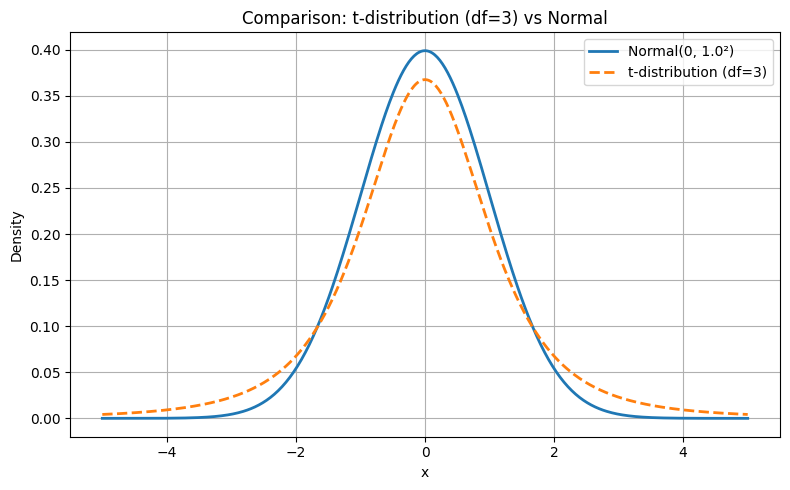

In [163]:
from utils import plot_tstudent_vs_normal

plot_tstudent_vs_normal(df=3)


Example of application:

* A manufacturer claims its batteries last at least 10 hours ($\mu = 10$).
* You test 36 batteries, get $\bar{x} = 9.5$, $\sigma = 1.2$

For solve this:

* $H0$: The average battery life is < 10 hours.
* $Ha$: The average battery life is >= 10 hours as claimed by the manufacturer
    * Using **one-sided t-test**

$$
z = \frac{9.5 -10.00}{\frac{1.2}{\sqrt{36}}} \equiv -2.5
$$


In [167]:
import scipy.stats as stats
import numpy as np
from statsmodels.stats.power import TTestPower

def one_sided_ttest(n=36, x_bar=9.5, s=1.2, mu_0=10, alpha=0.05):

    se = s / np.sqrt(n)
    t_stat = (x_bar - mu_0) / se
    p_value = 1 - stats.t.cdf(t_stat, df=n - 1)
    t_crit = stats.t.ppf(1 - alpha, df=n - 1)
    ci_lower = x_bar - t_crit * se

    # NOTE: effect size and Power
    # We dont know the population variance so we use s^2 instead
    effect_size = abs(x_bar - mu_0) / s
    power = TTestPower().power(effect_size=effect_size, nobs=n, alpha=alpha, alternative='larger')

    decision = (
        f"Reject H0: The battery life is significantly greater than {mu_0:.1f} hours."
        if p_value < alpha
        else f"Fail to reject H0: No significant evidence the battery lasts more than {mu_0:.1f} hours."
    )

    print(f"--- One-sided t-test (H0: μ < {mu_0}, Ha: μ ≥ {mu_0}) ---")
    print(f"Sample mean (x̄): {x_bar}")
    print(f"Sample std dev (s): {s}")
    print(f"t-statistic: {t_stat:.2f}")
    print(f"Critical t-value: {t_crit:.2f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Power: {power:.4f}")
    print(f"One-sided 95% CI: ({ci_lower:.2f}, ∞)")
    print(f"Decision: {decision}\n")

    return t_stat, p_value, ci_lower, power, decision


In [165]:
_ = one_sided_ttest(n=11, x_bar=10.6, s=1.2, mu_0=10, alpha=0.05)

--- One-sided t-test (H0: μ < 10, Ha: μ ≥ 10) ---
Sample mean (x̄): 10.6
Sample std dev (s): 1.2
t-statistic: 1.66
Critical t-value: 1.81
p-value: 0.0641
Power: 0.4603
One-sided 95% CI: (9.94, ∞)
Decision: Fail to reject H0: No significant evidence the battery lasts more than 10.0 hours.



In [166]:
_ = one_sided_ttest(n=28, x_bar=10.4, s=1.2, mu_0=10, alpha=0.05)

--- One-sided t-test (H0: μ < 10, Ha: μ ≥ 10) ---
Sample mean (x̄): 10.4
Sample std dev (s): 1.2
t-statistic: 1.76
Critical t-value: 1.70
p-value: 0.0445
Power: 0.5297
One-sided 95% CI: (10.01, ∞)
Decision: Reject H0: The battery life is significantly greater than 10.0 hours.



=====

**REVIEW THIS HERE** 


this is not true anymore
$$
Ha \sim N(\mu_a = \mu_0 + \delta, )
$$


$$
t \sim t(\nu, \lambda)
$$

$$
\lambda = \frac{\mu_a - \mu_0}{\frac{s}{\sqrt{n}}}
$$

This $\delta$ represents the minimal difference to detect — either based on prior studies or on what would be meaningful in a practical or business context.


### hypothesis test: based on confidence intervals (Truthworth controlled experiments)

* see: /archived/facebook/2022-01-03-prep_facebook_1st_round_prod_case_tech_analysys.ipynb

In this metodology we shift the focus to confidence intervals and effect sizes instead of p-values and power.The statistical framework remains the same, this approach reframes the conversation: instead of asking whether an effect is statistically significant, we ask how large the effect is—and whether it's large enough to matter. Importantly, both methods—p-value testing and confidence interval analysis lead to the same conclusions in terms of statistical inference. 

However, by emphasizing confidence intervals, we gain an immediate sense of the range of plausible outcomes and can better assess whether the observed effect is practically meaningful, helping teams make more informed decisions about product changes and investments. For instance, a change of 0.2% for a small startup is not practical because the number of users are not so large like in big companies. Howerver can be practical significant for big tech companies where the products in big companies progress by small steps og 0.1% or 0.2% so in an year can be reach 2%.


The right way: 95% confidenc level means that taking many samples and computing the confidence interval in the same way 95% of the confidence interval contains the true value.



Cases:

1. Easy: The results is NOT statisical significant
    * The change does nothing. You should decide to iterate of stop the project
    
1. Easy: The results is statisical significant
    * Launch new feature

1. Statistical but not practical significant.
    * if the cost of launch is large than the benefits, DO NOT launch
    * if the cost is small or close to zero, just launch

1. Neutral. We need more data to draw a conclusion. If PM wants
    * You need to increase the sample size.
    * or test longer
    * Does not look likes promising. If you have otehr features more promising, test or try that one first

1. Practical significant but not statisical. There is a chance of know effect. 
    * REPEAT THE TEST WITH GREATHER POWER. Looks promise but we are almost certain.
    
1. Statistical and pratical. Certainly there is an effect but might not be practical signifcant
    * REPEAT THE TEST WITH GREATHER POWER. Looks promise but we are almost certain.


<img src="images/trustworthy_conf_interval.png" style="float:left" width="400" align="right">



**Common Mistake**

* 95% confidence intervals means 95% of chance the confidence intervals contains the true population mean (we dont know that. it might or not)


### hypothesis test: bootstrap

* TODO:
* use my org mode notes as start

### Simpson paradox

* TODO: